# **Tarea 1 - Ejercicio 7**

### Reconocimiento de Patrones

*Estudiante: Cielo Aholiva Higuera Gutiérrez*

In [7]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import scipy.stats
from scipy.stats import multivariate_normal

**(a) Generar un conjunto de datos D1 de 1000 vectores bidimensionales que provienen de tres clases equiprobables modeladas por normales con vectores de medias**

In [8]:
# Función para generar datos
def generate_data(mu1, mu2, mu3, covariance_matrix, seed=24):

    # Semilla para reproducibilidad
    np.random.seed(seed)

    # Número de muestras para cada clase (1000/3)
    num_samples = math.floor(1000/3)

    # Genera datos para la clase 1 (1000/3 + 1)
    class1_data = multivariate_normal.rvs(mean=mu1, cov=covariance_matrix, size=num_samples+1)
    class1_df = pd.DataFrame(class1_data, columns=['x1', 'x2'])
    class1_df['label'] = 1

    # Genera datos para la clase 2 (1000/3)
    class2_data = multivariate_normal.rvs(mean=mu2, cov=covariance_matrix, size=num_samples)
    class2_df = pd.DataFrame(class2_data, columns=['x1', 'x2'])
    class2_df['label'] = 2

    # Genera datos para la clase 3 (1000/3)
    class3_data = multivariate_normal.rvs(mean=mu3, cov=covariance_matrix, size=num_samples)
    class3_df = pd.DataFrame(class3_data, columns=['x1', 'x2'])
    class3_df['label'] = 3

    # Concatena todos los datos (1000)
    D = pd.concat([class1_df, class2_df, class3_df], ignore_index=True)

    return D


# Medias de las clases
mu1 = np.array([1, 1])
mu2 = np.array([12, 8])
mu3 = np.array([16, 1])

# Matrices de covarianza
covariance_matrix = 4 * np.eye(2)  # Matriz identidad de tamaño 2x2 multiplicada por 4

# Generar el conjunto de datos D1
D1 = generate_data(mu1, mu2, mu3, covariance_matrix)

display(D1)

,x1,x2,label
0,3.658424,-0.540067,1
1,0.367439,-0.981621,1
2,-1.141633,-1.877427,1
3,2.128834,1.591444,1
4,-2.252808,1.439130,1
...,...,...,...
995,15.487247,3.283267,3
996,17.190570,-1.219196,3
997,19.101516,0.280277,3
998,13.274657,-0.227071,3


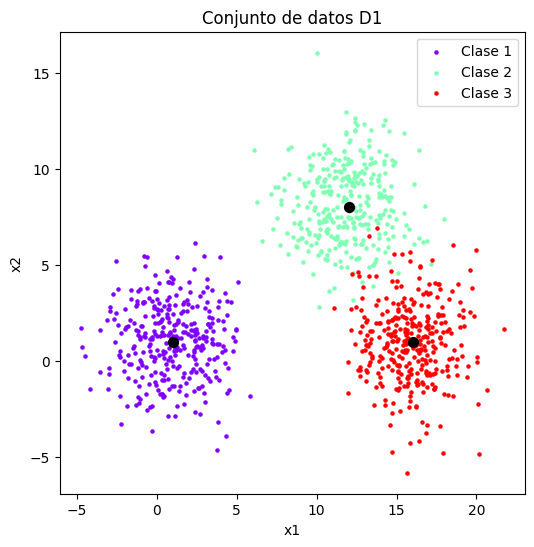

In [9]:
def visualize_dataset(D, mu1, mu2, mu3, titulo=''):

    x1 = D['x1']
    x2 = D['x2']
    labels = D['label']

    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

    plt.figure(figsize=(6, 6))
    for label, color in zip(unique_labels, colors):
        indices = labels == label
        plt.scatter(x1[indices], x2[indices], s=5, label=f'Clase {int(label)}', color=color)

    # Graficar las medias de cada clase
    plt.scatter(mu1[0], mu1[1], s=50, c='black', marker='o')
    plt.scatter(mu2[0], mu2[1], s=50, c='black', marker='o')
    plt.scatter(mu3[0], mu3[1], s=50, c='black', marker='o')

    plt.title(titulo)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(False)
    plt.show()
    return

# Graficar los datos
visualize_dataset(D1, mu1, mu2, mu3, 'Conjunto de datos D1')

a.i) Aplicar los clasificadores Bayesiano (con estimación Máxima Verosimilitud), Euclideano y pot distancia  Mahalanobis a D1.

In [10]:
# Clasificador Bayesiano
def bayesian_classifier(x, mu1, mu2, mu3, covariance_matrix):

    prior = 1/3
    g_i = []

    # Utilizando la función discriminante Gaussiana para cada clase
    g_i.append(-0.5 * np.dot(np.dot((x - mu1).T, np.linalg.inv(covariance_matrix)), (x - mu1)) + np.log(prior))
    g_i.append(-0.5 * np.dot(np.dot((x - mu2).T, np.linalg.inv(covariance_matrix)), (x - mu2)) + np.log(prior))
    g_i.append(-0.5 * np.dot(np.dot((x - mu3).T, np.linalg.inv(covariance_matrix)), (x - mu3)) + np.log(prior))

    return np.argmax(g_i) + 1 # Devuelve la clase correspondiente


# Clasificador Euclidiano
def euclidean_classifier(x, mu1, mu2, mu3):

    euclidean_distances = []

    euclidean_distances.append(np.linalg.norm(x - mu1))
    euclidean_distances.append(np.linalg.norm(x - mu2))
    euclidean_distances.append(np.linalg.norm(x - mu3))

    return np.argmin(euclidean_distances) + 1 # Devuelve la clase correspondiente

# Clasificador por distancia de Mahalanobis
def mahalanobis_classifier(x, mu1, mu2, mu3, covariance_matrix):

    mahalanobis_distances = []

    mahalanobis_distances.append(np.dot(np.dot((x - mu1).T, np.linalg.inv(covariance_matrix)), (x - mu1)))
    mahalanobis_distances.append(np.dot(np.dot((x - mu2).T, np.linalg.inv(covariance_matrix)), (x - mu2)))
    mahalanobis_distances.append(np.dot(np.dot((x - mu3).T, np.linalg.inv(covariance_matrix)), (x - mu3)))

    return np.argmin(mahalanobis_distances) + 1 # Devuelve la clase correspondiente

# Función para aplicar clasificadores a los datos
def apply_classifiers(D, mu1, mu2, mu3, covariance_matrix):

    D['Bayesian_Classifier'] = D[['x1', 'x2']].apply(lambda x: bayesian_classifier(x, mu1, mu2, mu3, covariance_matrix), axis=1)
    D['Euclidean_Classifier'] = D[['x1', 'x2']].apply(lambda x: euclidean_classifier(x, mu1, mu2, mu3), axis=1)
    D['Mahalanobis_Classifier'] = D[['x1', 'x2']].apply(lambda x: mahalanobis_classifier(x, mu1, mu2, mu3, covariance_matrix), axis=1)


# Aplicar los clasificadores a los datos D1
apply_classifiers(D1, mu1, mu2, mu3, covariance_matrix)

display(D1)

,x1,x2,label,Bayesian_Classifier,Euclidean_Classifier,Mahalanobis_Classifier
0,3.658424,-0.540067,1,1,1,1
1,0.367439,-0.981621,1,1,1,1
2,-1.141633,-1.877427,1,1,1,1
3,2.128834,1.591444,1,1,1,1
4,-2.252808,1.439130,1,1,1,1
...,...,...,...,...,...,...
995,15.487247,3.283267,3,3,3,3
996,17.190570,-1.219196,3,3,3,3
997,19.101516,0.280277,3,3,3,3
998,13.274657,-0.227071,3,3,3,3


a.ii) Calcular el error de clasificación para cada clasificador

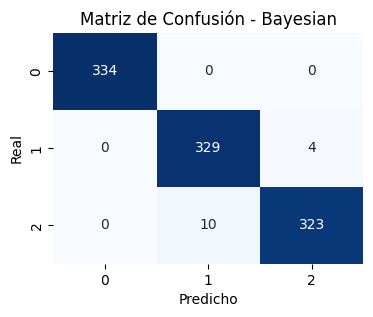

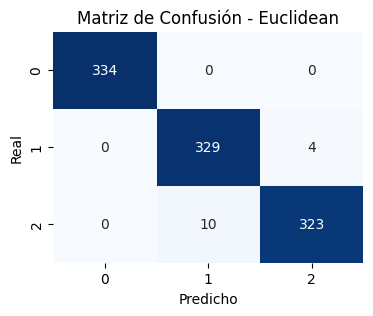

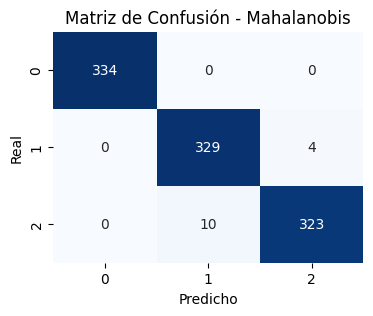


Resumen de errores de clasificación:


,Clasificador,Error
0,Bayesian,0.014
1,Euclidean,0.014
2,Mahalanobis,0.014


In [12]:
def classification_error(true_labels, predicted_labels):
    """
    Calcula la tasa de error de clasificación.
    """
    incorrect_predictions = (true_labels != predicted_labels).sum()
    total_samples = len(true_labels)
    return incorrect_predictions / total_samples

def classifier_evaluation(D, show_confusion_matrices=True):
    """
    Evalúa el desempeño de clasificadores Bayesiano, Euclidiano y de Mahalanobis.
    Muestra tasas de error y matrices de confusión.
    """
    classifiers = ['Bayesian_Classifier', 'Euclidean_Classifier', 'Mahalanobis_Classifier']
    results = []

    for clf in classifiers:
        error = classification_error(D['label'], D[clf])
        cm = confusion_matrix(D['label'], D[clf])
        results.append({'Clasificador': clf.replace('_Classifier', ''),
                        'Error': error})

        if show_confusion_matrices:
            plt.figure(figsize=(4, 3))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.title(f'Matriz de Confusión - {clf.replace("_Classifier", "")}')
            plt.xlabel('Predicho')
            plt.ylabel('Real')
            plt.show()

    result_df = pd.DataFrame(results)
    print("\nResumen de errores de clasificación:")
    display(result_df)

# Evaluar clasificadores en D1
classifier_evaluation(D1)

**b) Generar un conjunto de datos D2 de 1000 vectores bi-dimensionales que provienen de tres clases equipobables modeladas por normales con vectores de medias.**

In [13]:
# Medias de las clases
mu1 = np.array([1, 1])
mu2 = np.array([14, 7])
mu3 = np.array([16, 1])

# Matrices de covarianza
covariance_matrix = 4 * np.array([[5, 3], [3, 4]])

# Generar el conjunto de datos D2
D2 = generate_data(mu1, mu2, mu3, covariance_matrix)

display(D2)

,x1,x2,label
0,-3.368140,-5.138038,1
1,3.872399,0.296713,1
2,7.733777,2.149880,1
3,-1.827037,-0.458703,1
4,7.473041,7.178558,1
...,...,...,...
995,15.291981,4.014247,3
996,15.237723,-3.158361,3
997,10.063018,-5.168579,3
998,22.668522,4.706837,3


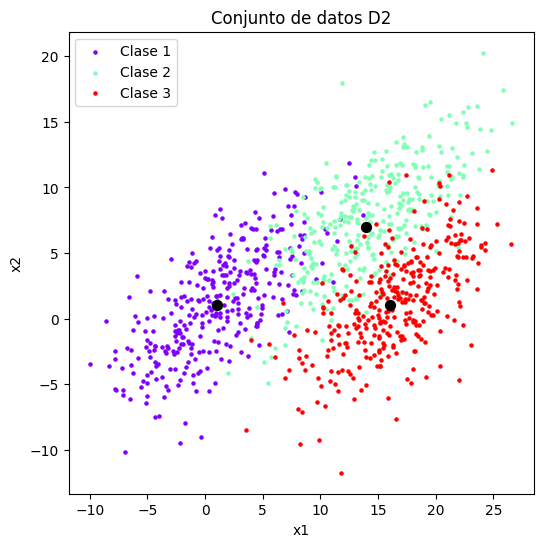

In [14]:
# Graficar los datos
visualize_dataset(D2, mu1, mu2, mu3, 'Conjunto de datos D2')

b.i) Aplicar los clasificadores Bayesianos (con estimación Máxima Verosimilitud), Euclideano y por distancia Mahalanobis a D2

In [15]:
apply_classifiers(D2, mu1, mu2, mu3, covariance_matrix)
display(D2)

,x1,x2,label,Bayesian_Classifier,Euclidean_Classifier,Mahalanobis_Classifier
0,-3.368140,-5.138038,1,1,1,1
1,3.872399,0.296713,1,1,1,1
2,7.733777,2.149880,1,2,1,2
3,-1.827037,-0.458703,1,1,1,1
4,7.473041,7.178558,1,1,2,1
...,...,...,...,...,...,...
995,15.291981,4.014247,3,3,3,3
996,15.237723,-3.158361,3,3,3,3
997,10.063018,-5.168579,3,3,3,3
998,22.668522,4.706837,3,3,3,3


b.ii) Calcular el error de clasificación para cada clasificador

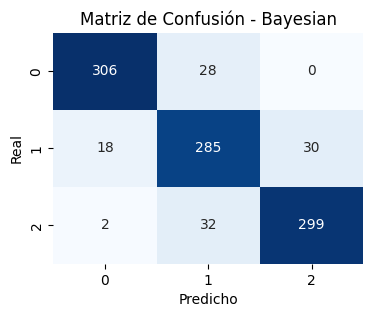

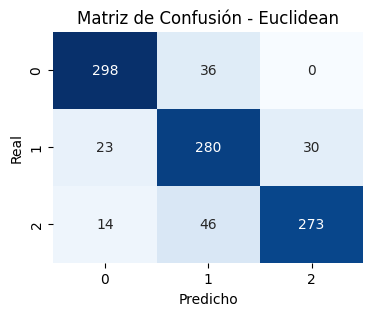

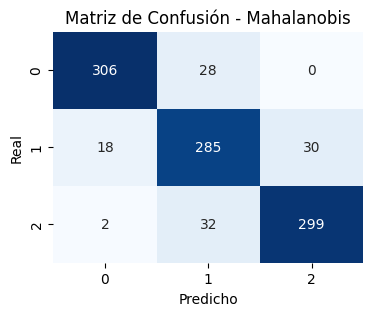


Resumen de errores de clasificación:


,Clasificador,Error
0,Bayesian,0.110
1,Euclidean,0.149
2,Mahalanobis,0.110


In [16]:
classifier_evaluation(D2)

**C) Generar un conjunto de datos D3 con 1000 vectores bi-dimensionales que provienen de tres clases equiprobables modeladas por normales con vectores de medias.**

In [17]:
# Medias de las clases
mu1 = np.array([1, 1])
mu2 = np.array([8, 6])
mu3 = np.array([13, 1])

# Matrices de covarianza (matriz identidad en este caso)
covariance_matrix = 6 * np.eye(2)  # Matriz identidad de tamaño 2x2 multiplicada por 6

# Generar el conjunto de datos D3
D3 = generate_data(mu1, mu2, mu3, covariance_matrix)

display(D3)

,x1,x2,label
0,4.255892,-0.886189,1
1,0.225275,-1.426980,1
2,-1.622953,-2.524113,1
3,2.382533,1.724368,1
4,-2.983860,1.537823,1
...,...,...,...
995,12.372008,3.796420,3
996,14.458145,-1.717948,3
997,16.798565,0.118523,3
998,9.662150,-0.502849,3


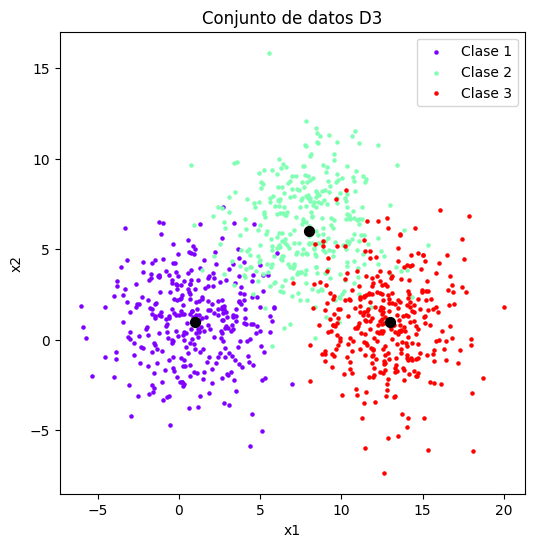

In [18]:
# Graficar los datos
visualize_dataset(D3, mu1, mu2, mu3, 'Conjunto de datos D3')

c.i) Aplicar los clasificadores Bayesiano (con estimación Máxima Verosimilitud), Euclideano y por distancia Mahalanobis a D3

In [19]:
apply_classifiers(D3, mu1, mu2, mu3, covariance_matrix)
display(D3)

,x1,x2,label,Bayesian_Classifier,Euclidean_Classifier,Mahalanobis_Classifier
0,4.255892,-0.886189,1,1,1,1
1,0.225275,-1.426980,1,1,1,1
2,-1.622953,-2.524113,1,1,1,1
3,2.382533,1.724368,1,1,1,1
4,-2.983860,1.537823,1,1,1,1
...,...,...,...,...,...,...
995,12.372008,3.796420,3,3,3,3
996,14.458145,-1.717948,3,3,3,3
997,16.798565,0.118523,3,3,3,3
998,9.662150,-0.502849,3,3,3,3


c.ii) Calcular el error de clasificación para cada clasificador

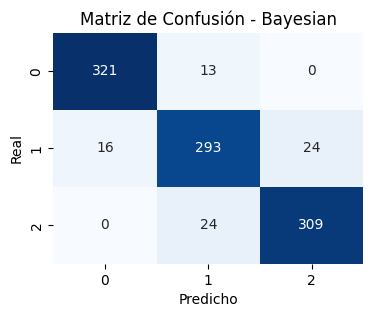

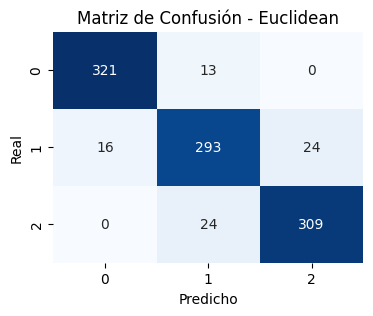

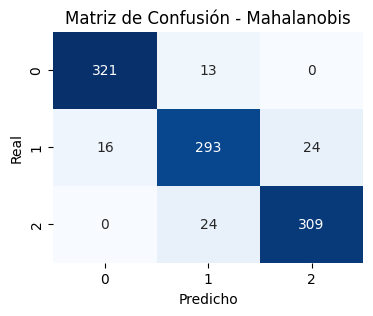


Resumen de errores de clasificación:


,Clasificador,Error
0,Bayesian,0.077
1,Euclidean,0.077
2,Mahalanobis,0.077


In [20]:
classifier_evaluation(D3)

**d) Generar un conjunto de datos D4 de 1000 vectores bi-dimensionales que provienen de tres clases equiprobables modeladas por normales con vectores de medias**

In [21]:
# Medias de las clases
mu1 = np.array([1, 1])
mu2 = np.array([10, 5])
mu3 = np.array([11, 1])

# Matrices de covarianza
covariance_matrix = 4 * np.array([[7, 4], [4, 5]])

# Generar el conjunto de datos D4
D4 = generate_data(mu1, mu2, mu3, covariance_matrix)

display(D4)

,x1,x2,label
0,-4.368398,-5.868344,1
1,4.257079,0.098750,1
2,8.796825,2.086256,1
3,-2.329566,-0.571644,1
4,8.787220,7.843341,1
...,...,...,...
995,10.360839,4.469557,3
996,9.885299,-3.727567,3
997,3.828766,-5.850097,3
998,18.869230,5.011308,3


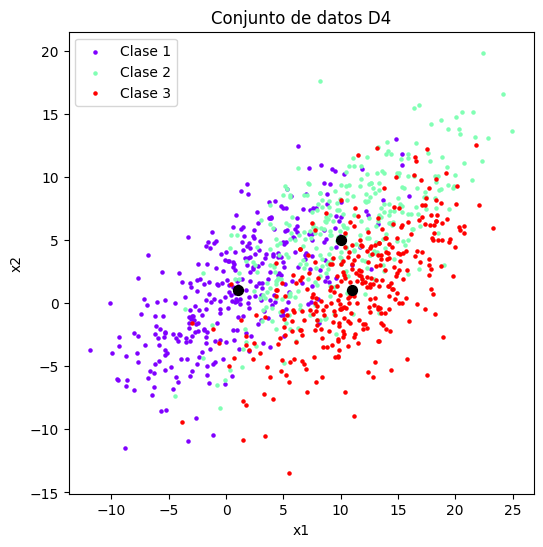

In [22]:
# Graficar los datos
visualize_dataset(D4, mu1, mu2, mu3, 'Conjunto de datos D4')

d.i) Aplicar los clasificadores Bayesiano (con estimación Máxima Verosimilitud), Euclideano y por distancia Mahalanobis a D4.

In [23]:
apply_classifiers(D4, mu1, mu2, mu3, covariance_matrix)
display(D4)

,x1,x2,label,Bayesian_Classifier,Euclidean_Classifier,Mahalanobis_Classifier
0,-4.368398,-5.868344,1,1,1,1
1,4.257079,0.098750,1,1,1,1
2,8.796825,2.086256,1,2,3,2
3,-2.329566,-0.571644,1,1,1,1
4,8.787220,7.843341,1,2,2,2
...,...,...,...,...,...,...
995,10.360839,4.469557,3,2,2,2
996,9.885299,-3.727567,3,3,3,3
997,3.828766,-5.850097,3,3,1,3
998,18.869230,5.011308,3,3,3,3


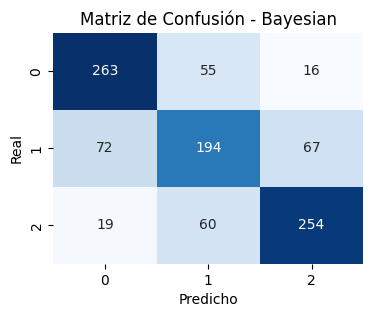

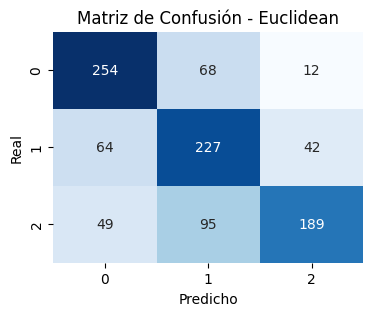

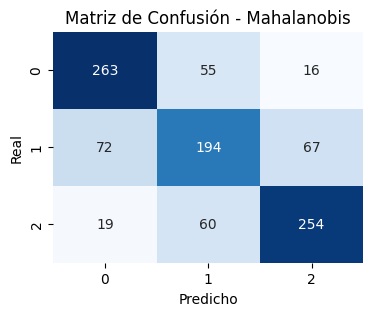


Resumen de errores de clasificación:


,Clasificador,Error
0,Bayesian,0.289
1,Euclidean,0.330
2,Mahalanobis,0.289


In [24]:
classifier_evaluation(D4)

**e) Análisis y conclusiones de los resultados experimentales**

Al analizar los resultados obtenidos, se observa que en los conjuntos de datos correspondientes a los incisos a) y c), los tres clasificadores (bayesiano, euclidiano y de Mahalanobis) presentan el mismo porcentaje de error. Estos conjuntos, además, registran los errores de clasificación más bajos en comparación con los otros dos. Visualizando los datos, notamos que la matriz de covarianza en ambos casos es un múltiplo de la identidad, lo que genera distribuciones con forma aproximadamente circular. El radio de estas "nubes de datos" está determinado por el coeficiente con el que se multiplica la matriz identidad.

En el caso de D1, este coeficiente es 4, lo cual genera una dispersión menor respecto al conjunto D3, cuyo coeficiente es 6. Como resultado, las clases en D1 están más separadas: hay una ligera superposición entre las clases 2 y 3, mientras que la clase 1 permanece bien diferenciada. En cambio, en D3, la mayor dispersión incrementa las intersecciones entre las clases, lo que explica el aumento en el error de clasificación: 7.7% en comparación con el 1.4% observado en D1, aunque ambos valores son consistentes entre los tres clasificadores.

En cuanto a los conjuntos de datos de los incisos b) y d), cuyas matrices de covarianza no son diagonales, se evidencia un incremento general en los errores de clasificación. Específicamente, los clasificadores bayesiano y de Mahalanobis arrojan los mismos resultados para ambos conjuntos: 11% de error para D2 y 28.9% para D4. Por su parte, el clasificador euclidiano muestra un desempeño inferior en estos casos, con errores de 14.9% en D2 y 33% en D4.

Una posible explicación de por qué D4 tiene un mayor error que D2 radica en las características de sus matrices de covarianza. La matriz de D4 presenta elementos de mayor magnitud, lo que implica una mayor dispersión y, por consiguiente, un aumento en la superposición entre clases. Esto se refleja claramente en las visualizaciones, donde se aprecia que en D2 las clases están mejor delimitadas que en D4, lo que facilita su clasificación y explica los menores errores.

En general, los clasificadores bayesiano y de Mahalanobis superan al euclidiano, especialmente en los casos donde las clases presentan solapamientos complejos. Esto se debe a que ambos modelos consideran la forma y orientación de las distribuciones de los datos a través de la matriz de covarianza, mientras que el euclidiano se limita a medir la distancia a la media sin tener en cuenta dicha estructura.

En resumen, los conjuntos D2 y D4 presentan mayores desafíos de clasificación debido a la complejidad de sus distribuciones y al mayor grado de intersección entre clases. Por el contrario, D1 y D3, con matrices de covarianza más simples (proporcionales a la identidad), resultan más fáciles de clasificar. En definitiva, estos resultados evidencian cómo la estructura estadística de los datos —determinada por sus medias y covarianzas—, junto con el tipo de clasificador empleado, tienen un impacto directo en el desempeño del sistema de clasificación.